Project Guide:

Using Python to answer the following question of SMS Spam Collection dataset.
                     
                     1. Identify which messages are spam.
                     2. What are the most common words in spam versus normal message? 
                     3. Create a word cloud visualizing the most common words in the dataset. 
                     4. What word is most likely to indicate that a message is spam?

In [5]:
%%capture 
!pip install wordcloud

In [6]:
#Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import string
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
# Load the dataset
sms_df = pd.read_csv('SMSSpamCollection.csv', names=['label', 'text'])
sms_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
sms_df.describe()

,label,text
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
#identify which messages are spam.
sms_spam = sms_df.loc[(sms_df.label == 'spam')]
sms_spam.describe()

,label,text
count,747,747
unique,1,642
top,spam,Please call our customer service representativ...
freq,747,4


In [10]:
sms_df.shape

(5572, 2)

In [11]:
#create sub-dataframe of spam text
spam_df = sms_df[sms_df['label'] == 'spam']
ham_df = sms_df[sms_df['label'] == 'ham']

spam_df

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
stop_words = set(STOPWORDS)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [15]:
def tokenize(text):
   ## exclude = set(string.punctuation)
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') #remove punctuation
    text = regex.sub(' ', text)
    tokens = nltk.word_tokenize(text) # tokenize the text
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens)) # remove stop words
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

spam_df['tokens'] = spam_df['text'].map(tokenize)
ham_df['tokens'] = ham_df['text'].map(tokenize)

In [16]:
#what are the most common words in spam versus normal messages.
spam_words = []
for token in spam_df['tokens']:
    spam_words = spam_words + token 
    
ham_words = []
for token in ham_df['tokens']:
    ham_words += token
    
spam_count = Counter(spam_words).most_common()
ham_count = Counter(ham_words).most_common()
spam_count_df = pd.DataFrame(spam_count, columns = ['word', 'count'])
ham_count_df = pd.DataFrame(ham_count, columns = ['word', 'count'])

spam_count_df.head()


,word,count
0,call,370
1,free,228
2,now,203
3,txt,170
4,mobile,129


In [17]:
ham_count_df.head()

,word,count
0,will,346
1,now,300
2,got,246
3,call,238
4,know,237


In [18]:
spam_df.head()

,label,text,tokens
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, cup, final, tkt..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,"[freemsg, hey, darling, week, now, word, back,..."
8,spam,WINNER!! As a valued network customer you have...,"[winner, valued, network, customer, selected, ..."
9,spam,Had your mobile 11 months or more? U R entitle...,"[mobile, months, entitled, update, latest, col..."
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...","[six, chances, win, cash, pounds, txt, csh, se..."


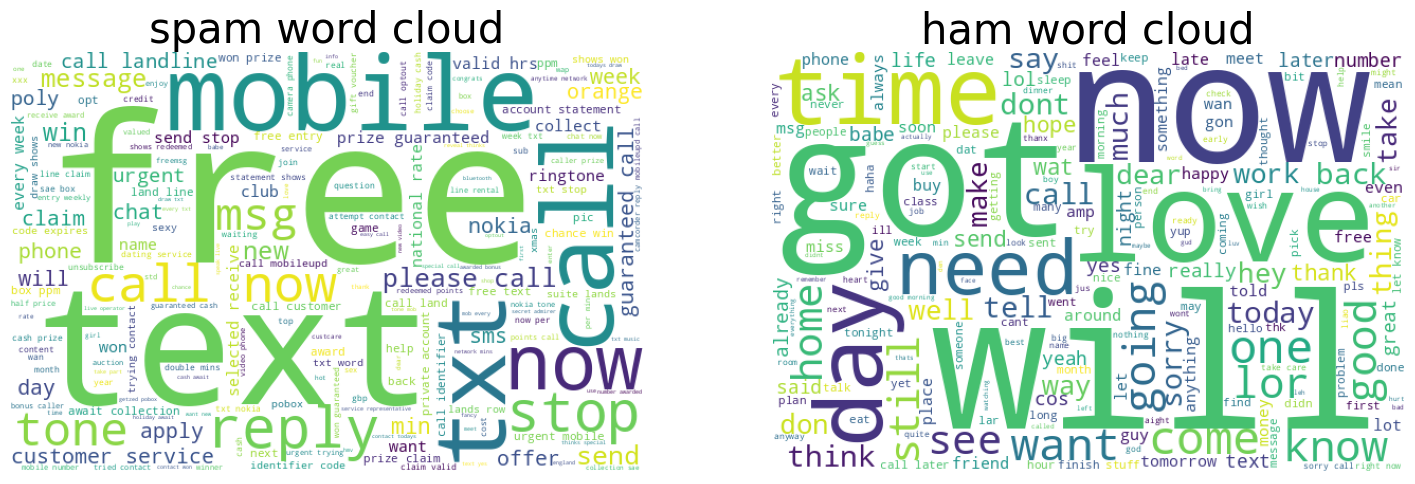

In [19]:
#Create a word cloud visualizing the most common words in the datasets

#joined all the spam words into a paragraph
spam_words_str = ' '.join(spam_words) 
ham_words_str = ' '.join(ham_words)

spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(spam_words_str)
ham_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(ham_words_str)
fig, (ax, ax2) = plt.subplots(1,2, figsize = (18,8))

ax.imshow(spam_word_cloud)
ax.axis('off')
ax.set_title('spam word cloud', fontsize = 30)

ax2.imshow(ham_word_cloud)
ax2.axis('off')
ax2.set_title('ham word cloud', fontsize = 30)

plt.savefig('spam_word_cloud.png')


plt.show()

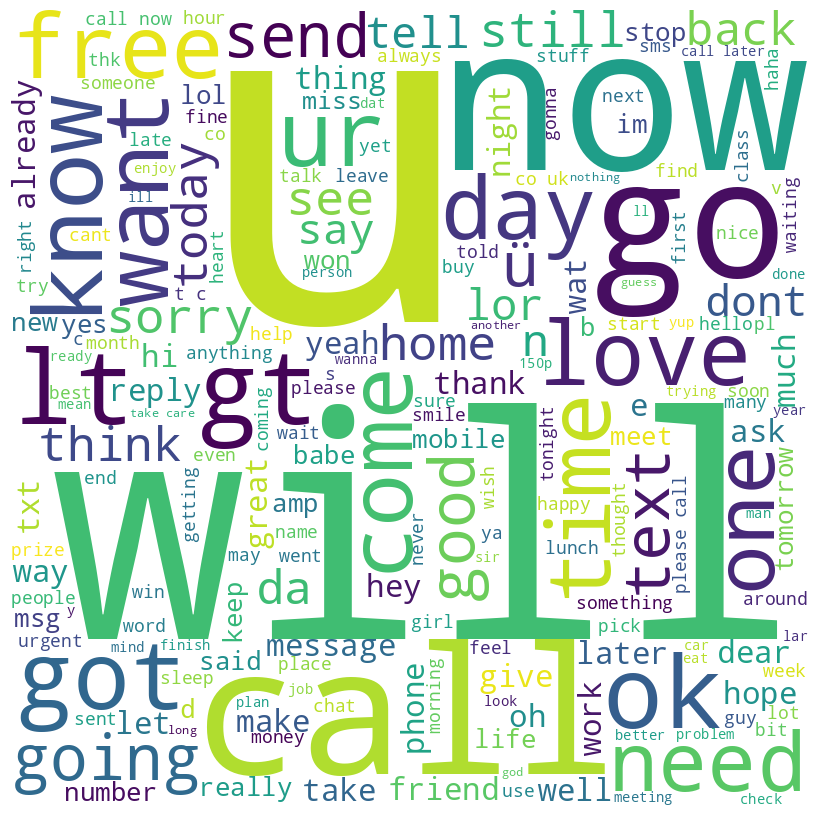

In [22]:
comment_wrds = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for text in sms_df.text:
     
    # typecaste each val to string
    text = str(text)
 
    # split the value
    tokens = text.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_wrds += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_wrds)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')  
plt.show()